In [1]:
import sarabande as s
import numpy as np
from subprocess import call
import astropy.io.fits as pyf
import time
import matplotlib.pyplot as plt
plt.style.use("light_mode")

s.about()

-------------------------------
-    Welcome to Sarabande!    -
-------------------------------
Version: 0.0.1-alpha
Authors: J. Sunseri
-------------------------------
Download the latest version from: pending
Report issues to: https://github.com/James11222/sarabande
Read the documentations at: pending
-------------------------------



In [2]:
s.utils.test_print()

a simple function to make sure this module works.


In [3]:
# !wget https://users.flatironinstitute.org/~bburkhart/data/CATS/MHD/256/b.1p.32/t_800/dens_t800.fits.gz
# !ls

In [4]:
hdulist = pyf.open('dens_t800.fits.gz')
data = hdulist[0].data.astype(np.float64) # hopefully 64 is enough?


data = data[:128,:128,:128]

# plt.imshow(data[:,64,:], origin='lower')

In [5]:
save_dir = '/Users/jamessunseri/Desktop/package_testing/test_data/'

_4PCF = s.measure(nPCF=4, projected=False, density_field_data = data, save_dir=save_dir, save_name='test_run', ell_max=1, nbins=4)

In [7]:
# _4PCF.__dict__

In [7]:
print("Creating XYZ Grids for radial bin and ylm creation ... \n")
s.create_XYZR(_3PCF)

print("Creating radial bins ... \n")
s.create_radial_bins(_3PCF)


print("taking the fourier transform of data ... \n")
s.calc_ft_data(_3PCF)

print("calculating YLM Coefficients ... \n")
s.calc_and_save_YLMs(_3PCF)

Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

calculating YLM Coefficients ... 



In [8]:
web = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/ylm_demo_0_0.npy')
local = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/ylm_test_run_0_0.npy')

# web==local

In [9]:
print("binning spherical harmonics ... \n")
s.bin_spherical_harmonics(_3PCF)

binning spherical harmonics ... 

Binning Spherical Harmonics...
ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3


In [10]:
web = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/YLMtilde_demo_0_0_bin_0.npy')
local = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/YLMtilde_test_run_0_0_bin_0.npy')

# web==local

In [11]:
s.calc_a_lm_coeffs(_3PCF, kernel_name=_3PCF.save_name)


Calculating almb coefficients...

l, m, bin = 0 0 0
l, m, bin = 0 0 1
l, m, bin = 0 0 2
l, m, bin = 0 0 3
l, m, bin = 1 0 0
l, m, bin = 1 0 1
l, m, bin = 1 0 2
l, m, bin = 1 0 3
l, m, bin = 1 1 0
l, m, bin = 1 1 1
l, m, bin = 1 1 2
l, m, bin = 1 1 3


In [12]:
web = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/dens_t800conv_data_kernel_demo_0_0_bin_0.npy')
local = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/test_runconv_data_kernel_test_run_0_0_bin_0.npy')

web==local

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [7]:
s.calc_zeta(_4PCF, skip_prepare=False)

Preparing the data:
Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

calculating YLM Coefficients ... 

binning spherical harmonics ... 

Binning Spherical Harmonics...
ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
calculating a_lm coefficients ... 


Calculating almb coefficients...

l, m, bin = 0 0 0
l, m, bin = 0 0 1
l, m, bin = 0 0 2
l, m, bin = 0 0 3
l, m, bin = 1 0 0
l, m, bin = 1 0 1
l, m, bin = 1 0 2
l, m, bin = 1 0 3
l, m, bin = 1 1 0
l, m, bin = 1 1 1
l, m, bin = 1 1 2
l, m, bin = 1 1 3
waiting for implementation
Executing 4PCF Calculation ...
Finished Calculating 4PCF in 4.4229 seconds


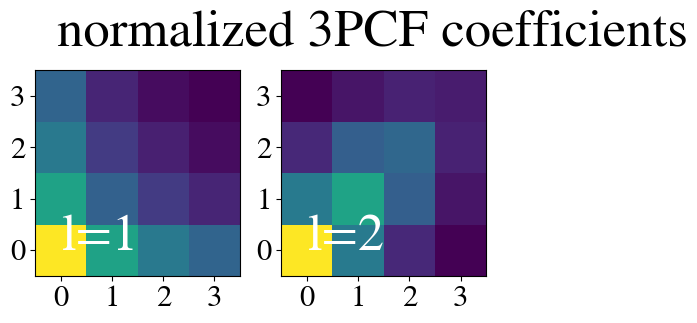

In [9]:

ell_max=1
nbins = 4
plt.figure(figsize=(9,6))
for ell in range(0, ell_max+1, 1):
    plt.subplot(2,3,ell+1)
    plt.text(0,0,'l='+str(ell+1), c='white', fontsize='xx-large')
    plt.imshow(_3PCF.zeta[ell,:,:].real, origin='lower')
    plt.xticks(range(nbins))
    plt.yticks(range(nbins))
    if ell == 3:
        plt.xlabel('bin 1')
        plt.ylabel('bin 2')
plt.suptitle('normalized 3PCF coefficients', fontsize='xx-large')
plt.show()

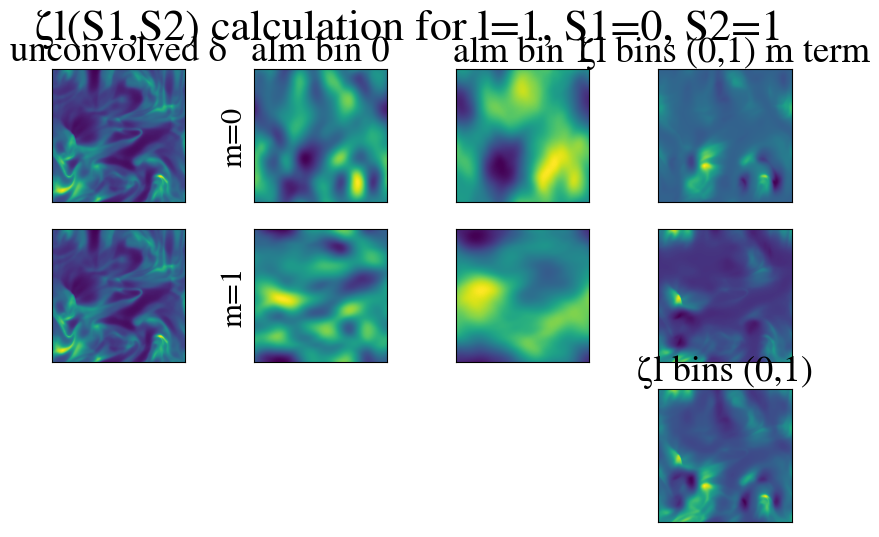

In [10]:
ell = 1
bin1 = 0
bin2 = 1
save_name = _3PCF.save_name
kernel_name= _3PCF.save_name
ld_one_d = _3PCF.ld_one_d
plt.figure(figsize=(10,6))
cumulate = np.zeros_like(data, dtype=np.complex128)
for m in range(0,ell+1, 1):
    ylm_b1 = np.load(save_dir + save_name+'conv_data_kernel_'+kernel_name+'_'+str(ell)+
                      '_'+str(m)+'_bin_'+str(bin1)+'.npy').astype(np.complex128)
    ylm_b2 = np.load(save_dir + save_name+'conv_data_kernel_'+kernel_name+'_'+str(ell)+
                      '_'+str(m)+'_bin_'+str(bin2)+'.npy').astype(np.complex128)
    plt.subplot(ell+2,4,m*4+1)
    if m == 0:
        plt.title('unconvolved δ')
    plt.imshow(data[:,ld_one_d//2,:])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(ell+2,4,m*4+2)
    plt.imshow(ylm_b1[:,ld_one_d//2,:].real)
    if m == 0:
        plt.title('alm bin '+str(bin1))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('m='+str(m))
    plt.subplot(ell+2,4,m*4+3)
    plt.imshow(ylm_b2[:,ld_one_d//2,:].real)
    if m == 0:
        plt.title('alm bin '+str(bin2))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(ell+2,4,m*4+4)
    if m == 0:
        plt.title('ζl bins ('+str(bin1)+','+str(bin2)+') m term')
    plt.imshow((data*ylm_b1*ylm_b2.conjugate())[:,ld_one_d//2,:].real)
    cumulate += data*ylm_b1*ylm_b2.conjugate()
    if m > 1:
        cumulate += data*ylm_b1.conjugate()*ylm_b2
    plt.xticks([])
    plt.yticks([])

plt.subplot(ell+2,4,(ell+1)*4+4)
plt.title('ζl bins ('+str(bin1)+','+str(bin2)+')')
plt.imshow((cumulate)[:,ld_one_d//2,:].real)
plt.xticks([])
plt.yticks([])

plt.suptitle('ζl(S1,S2) calculation for l=1, S1=0, S2=1', fontsize='x-large')
plt.show()

In [15]:
data_web = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/dens_t800conv_data_kernel_demo_0_0_bin_0.npy')
data_local = np.load('/Users/jamessunseri/Desktop/package_testing/test_data/test_runconv_data_kernel_test_run_0_0_bin_0.npy')
                   
np.where(data_web == data_local)


(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [8]:
np.shape(_4PCF.zeta)

(2, 2, 2, 4, 4, 4)

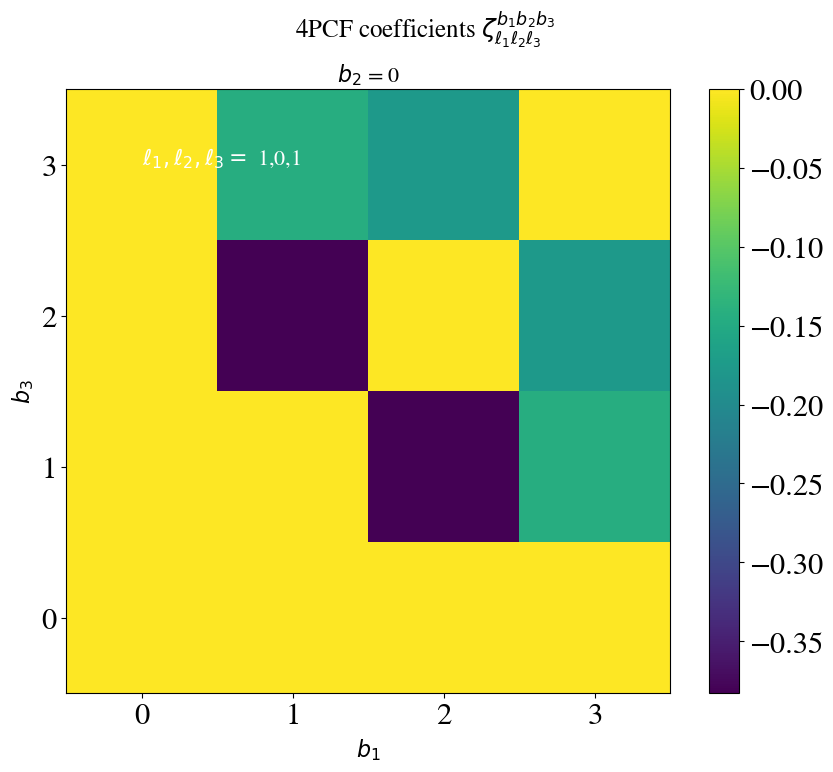

In [23]:
ells='101'
sup_title_fontsize = 18
text_fontsize = 16
xylabel_fontsize = 16
sub_title_fontsize = 16
b_2 = 0
zeta = _4PCF.zeta
nbins = _4PCF.nbins
ell_max = _4PCF.ell_max                            
l_1,l_2,l_3 = int(ells[0]), int(ells[1]), int(ells[2]) 
ells_string = '$\ell_1, \ell_2, \ell_3 =$ ' + ells[0] + ',' + ells[1] + ',' + ells[2]
f, (ax1) = plt.subplots(1,1, figsize=(10,8))

f.suptitle('4PCF coefficients $\\zeta^{b_1 b_2 b_3}_{\ell_1 \ell_2 \ell_3}$', fontsize=sup_title_fontsize)

im1 = ax1.imshow(zeta[l_1,l_2,l_3,:,b_2,:].real, origin='lower')
ax1.text(0,nbins-1, ells_string, c='white', fontsize=text_fontsize)
ax1.set_title('$b_2$ = ' + str(b_2), fontsize=sub_title_fontsize)
ax1.set_xticks(range(nbins))
ax1.set_yticks(range(nbins))
ax1.set_xlabel("$b_1$",fontsize=xylabel_fontsize)
ax1.set_ylabel("$b_3$", fontsize=xylabel_fontsize)
# divider1 = axgrid.make_axes_locatable(ax1)
# cax1 = divider1.append_axes("right", size=colorbar_ax_percent, pad=0.05)
plt.colorbar(im1)